## Titanic Survival Prediction Dataset

In [1]:
# Import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get the data ready
import pandas as pd
titanic_data = pd.read_csv('Resources/Titanic Dataset.csv')
# Display the first few rows
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Check for missing values
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


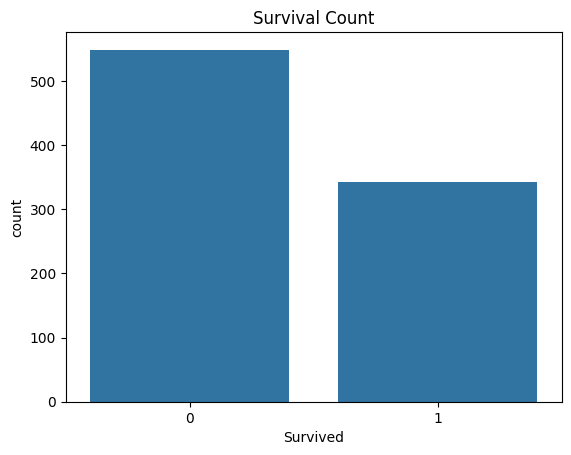

In [4]:
# Visualize the survival rate
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

In [5]:
# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])
titanic_data.drop(columns=['Cabin'])

# Convert categorical variables to numeric
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop irrelevant columns
titanic_data.drop(columns=['Name', 'Ticket', 'PassengerId'])

# Display the first few rows of the preprocessed dataset
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [6]:
# Drop irrelevant columns
titanic_data.drop(['Name', 'Ticket', 'PassengerId'],axis=1)
# Define features (X) and target (y)
x = titanic_data.drop(columns='Survived')
y = titanic_data['Survived']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [7]:
# Initialize the model
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

ValueError: could not convert string to float: 'Partner, Mr. Austen'

In [ ]:
# Make the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

In [ ]:
# Make predictions on the test set
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# Display confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_pred, 
                                        cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()